In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import category_encoders as ce

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/H2GTRM.TTF'  # 폰트 파일 경로
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

In [150]:
df = pd.read_csv('D:/김동영/11_Github/mygit/LGaimers 6기/Data/train.csv')
test_df = pd.read_csv('D:/김동영/11_Github/mygit/LGaimers 6기/Data/test.csv')

In [151]:
# 결측치 전부 0으로 대체
df['PGD 시술 여부'] = df['PGD 시술 여부'].fillna(0)
df['PGS 시술 여부'] = df['PGS 시술 여부'].fillna(0)

test_df['PGD 시술 여부'] = test_df['PGD 시술 여부'].fillna(0)
test_df['PGS 시술 여부'] = test_df['PGS 시술 여부'].fillna(0)

In [152]:
# 새로운 변수 생성
df['시술 여부'] = df.apply(lambda row: 1 if row['PGD 시술 여부'] == 1 else (-1 if row['PGS 시술 여부'] == 1 else 0), axis=1)

test_df['시술 여부'] = test_df.apply(lambda row: 1 if row['PGD 시술 여부'] == 1 else (-1 if row['PGS 시술 여부'] == 1 else 0), axis=1)

In [153]:
df = df.drop(['PGD 시술 여부', 'PGS 시술 여부'], axis=1)
test_df = test_df.drop(['PGD 시술 여부', 'PGS 시술 여부'], axis=1)

In [154]:
# Target Encoding을 사용하여 '시술 유형' 변수를 수치형 변수로 변환
encoder = ce.TargetEncoder(cols=['시술 유형'])
df['시술 유형'] = encoder.fit_transform(df['시술 유형'], df['임신 성공 여부'])

# 학습된 인코더를 사용하여 테스트 데이터프레임에 동일한 인코딩 적용
test_df['시술 유형'] = encoder.transform(test_df['시술 유형'])

test_df['시술 유형'].value_counts()

시술 유형
0.261605    87891
0.128914     2176
Name: count, dtype: int64

In [155]:
df['특정 시술 유형'] = df['특정 시술 유형'].replace('ICSI / BLASTOCYST :IVF / BLASTOCYST', 'ICSI / BLASTOCYST:IVF / BLASTOCYST')
test_df['특정 시술 유형'] = test_df['특정 시술 유형'].replace('ICSI / BLASTOCYST :IVF / BLASTOCYST', 'ICSI / BLASTOCYST:IVF / BLASTOCYST')

test_df['특정 시술 유형'] = test_df['특정 시술 유형'].replace('IVF:Unknown:Unknown:Unknown', 'IVF:Unknown')

df['특정 시술 유형'].unique()

df['특정 시술 유형'].isna().sum()
# 결측치 Unknown으로 대체
df['특정 시술 유형'] = df['특정 시술 유형'].fillna('Unknown')
test_df['특정 시술 유형'] = test_df['특정 시술 유형'].fillna('Unknown')

In [156]:
# Target Encoding을 사용하여 '시술 유형' 변수를 수치형 변수로 변환
encoder = ce.TargetEncoder(cols=['특정 시술 유형'])
df['특정 시술 유형'] = encoder.fit_transform(df['특정 시술 유형'], df['임신 성공 여부'])

# 학습된 인코더를 사용하여 테스트 데이터프레임에 동일한 인코딩 적용
test_df['특정 시술 유형'] = encoder.transform(test_df['특정 시술 유형'])

print(df['특정 시술 유형'].value_counts())
print(test_df['특정 시술 유형'].value_counts())

특정 시술 유형
0.272825    122368
0.261457     91755
0.237185     26941
0.128525      6100
0.009939      2314
0.356743      1609
0.366186      1248
0.010471      1146
0.234822       873
0.217165       769
0.283163       392
0.184953       319
0.101449       207
0.170030       100
0.135478        96
0.169555        71
0.159894        23
0.269551        10
0.221702         4
0.269931         3
0.292627         2
0.354844         1
Name: count, dtype: int64
특정 시술 유형
0.272825    43237
0.261457    32350
0.237185     9216
0.128525     2112
0.009939      797
0.356743      584
0.010471      406
0.366186      389
0.234822      298
0.217165      264
0.283163      133
0.184953      105
0.101449       68
0.170030       42
0.135478       28
0.169555       26
0.159894        8
0.269551        2
0.258349        2
Name: count, dtype: int64


In [157]:
df['단일 배아 이식 여부'] = df['단일 배아 이식 여부'].fillna(-1)
test_df['단일 배아 이식 여부'] = test_df['단일 배아 이식 여부'].fillna(-1)

In [158]:
# 결측치 -1로 대체
df['착상 전 유전 검사 사용 여부'] = df['착상 전 유전 검사 사용 여부'].fillna(-1)
df['착상 전 유전 진단 사용 여부'] = df['착상 전 유전 진단 사용 여부'].fillna(-1)

test_df['착상 전 유전 검사 사용 여부'] = test_df['착상 전 유전 검사 사용 여부'].fillna(-1)
test_df['착상 전 유전 진단 사용 여부'] = test_df['착상 전 유전 진단 사용 여부'].fillna(-1)

In [159]:
# 결측치 -1로 대체
df['배아 생성 주요 이유'] = df['배아 생성 주요 이유'].fillna(-1)
test_df['배아 생성 주요 이유'] = test_df['배아 생성 주요 이유'].fillna(-1)

# Target Encoding을 사용하여 '시술 유형' 변수를 수치형 변수로 변환
encoder = ce.TargetEncoder(cols=['배아 생성 주요 이유'])
df['배아 생성 주요 이유'] = encoder.fit_transform(df['배아 생성 주요 이유'], df['임신 성공 여부'])

# 학습된 인코더를 사용하여 테스트 데이터프레임에 동일한 인코딩 적용
test_df['배아 생성 주요 이유'] = encoder.transform(test_df['배아 생성 주요 이유'])

print(df['배아 생성 주요 이유'].value_counts())
print(test_df['배아 생성 주요 이유'].value_counts())

배아 생성 주요 이유
0.273570    233732
0.000870      9192
0.128914      6291
0.379757      3784
0.000000      3067
0.000007       125
0.265048        83
0.021488        44
0.304174        20
0.207243         6
0.247705         5
0.224736         2
Name: count, dtype: int64
배아 생성 주요 이유
0.273570    82253
0.000870     3151
0.128914     2176
0.379757     1327
0.000000     1048
0.000007       47
0.265048       38
0.021488       19
0.304174        6
0.247705        1
0.207243        1
Name: count, dtype: int64


In [160]:
# 사용할 변수 목록
selected_columns = [
    '시술 당시 나이', '시술 유형', '배란 자극 여부', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부',
    '남성 주 불임 원인', '여성 주 불임 원인', '부부 주 불임 원인', '배아 생성 주요 이유',
    'IVF 시술 횟수', 'DI 시술 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', 'IVF 출산 횟수', 'DI 출산 횟수',
    '미세주입에서 생성된 배아 수', '미세주입 배아 이식 수', '미세주입 후 저장된 배아 수', '해동 난자 수', '파트너 정자와 혼합된 난자 수',
    '난자 출처', '정자 출처', '난자 기증자 나이', '정자 기증자 나이', '신선 배아 사용 여부', '시술 여부','임신 성공 여부'
]

# 선택한 변수들만 포함된 데이터프레임 생성
filtered_df = df[selected_columns]
filtered_test_df = test_df[selected_columns[:-1]]

In [161]:
filtered_df.head()
filtered_df.info()

filtered_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   시술 당시 나이          256351 non-null  object 
 1   시술 유형             256351 non-null  float64
 2   배란 자극 여부          256351 non-null  int64  
 3   단일 배아 이식 여부       256351 non-null  float64
 4   착상 전 유전 검사 사용 여부  256351 non-null  float64
 5   착상 전 유전 진단 사용 여부  256351 non-null  float64
 6   남성 주 불임 원인        256351 non-null  int64  
 7   여성 주 불임 원인        256351 non-null  int64  
 8   부부 주 불임 원인        256351 non-null  int64  
 9   배아 생성 주요 이유       256351 non-null  float64
 10  IVF 시술 횟수         256351 non-null  object 
 11  DI 시술 횟수          256351 non-null  object 
 12  IVF 임신 횟수         256351 non-null  object 
 13  DI 임신 횟수          256351 non-null  object 
 14  IVF 출산 횟수         256351 non-null  object 
 15  DI 출산 횟수          256351 non-null  object 
 16  미세주입에서 생성된 배아 수   25

In [162]:
filtered_df['미세주입에서 생성된 배아 수'].value_counts()
filtered_df['미세주입 배아 이식 수'].value_counts()
filtered_df['미세주입 후 저장된 배아 수'].value_counts()
filtered_df['해동 난자 수'].value_counts()
filtered_df['파트너 정자와 혼합된 난자 수'].value_counts()

파트너 정자와 혼합된 난자 수
0.0     62921
6.0     15012
7.0     14706
5.0     14229
8.0     14070
9.0     13055
4.0     12416
10.0    12017
11.0    10713
3.0     10103
12.0     9463
2.0      8077
13.0     8043
14.0     7030
15.0     6028
1.0      5722
16.0     4898
17.0     4021
18.0     3293
19.0     2680
20.0     2222
21.0     1792
22.0     1477
23.0     1213
24.0      967
25.0      757
26.0      598
27.0      502
28.0      410
29.0      295
30.0      260
31.0      183
32.0      171
33.0      131
34.0      113
35.0      100
36.0       72
37.0       64
38.0       47
39.0       34
40.0       31
51.0       28
42.0       21
43.0       17
41.0       16
46.0       12
47.0        7
44.0        7
45.0        5
49.0        4
50.0        4
48.0        3
Name: count, dtype: int64

In [163]:
# 결측치를 -1로 대체할 변수 목록
columns_to_fill = ['미세주입에서 생성된 배아 수', '미세주입 배아 이식 수', '미세주입 후 저장된 배아 수', '해동 난자 수', '파트너 정자와 혼합된 난자 수', '신선 배아 사용 여부']

# 결측치를 -1로 대체
filtered_df[columns_to_fill] = filtered_df[columns_to_fill].fillna(-1)
filtered_test_df[columns_to_fill] = filtered_test_df[columns_to_fill].fillna(-1)

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_2556\2584862500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[columns_to_fill] = filtered_df[columns_to_fill].fillna(-1)
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_2556\2584862500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df[columns_to_fill] = filtered_test_df[columns_to_fill].fillna(-1)


In [164]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   시술 당시 나이          256351 non-null  object 
 1   시술 유형             256351 non-null  float64
 2   배란 자극 여부          256351 non-null  int64  
 3   단일 배아 이식 여부       256351 non-null  float64
 4   착상 전 유전 검사 사용 여부  256351 non-null  float64
 5   착상 전 유전 진단 사용 여부  256351 non-null  float64
 6   남성 주 불임 원인        256351 non-null  int64  
 7   여성 주 불임 원인        256351 non-null  int64  
 8   부부 주 불임 원인        256351 non-null  int64  
 9   배아 생성 주요 이유       256351 non-null  float64
 10  IVF 시술 횟수         256351 non-null  object 
 11  DI 시술 횟수          256351 non-null  object 
 12  IVF 임신 횟수         256351 non-null  object 
 13  DI 임신 횟수          256351 non-null  object 
 14  IVF 출산 횟수         256351 non-null  object 
 15  DI 출산 횟수          256351 non-null  object 
 16  미세주입에서 생성된 배아 수   25

In [165]:
# Target Encoding을 적용할 변수 목록
target_encoding_columns = ['시술 당시 나이', 'IVF 시술 횟수', 'DI 시술 횟수', 'IVF 임신 횟수', 
                           'DI 임신 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 출처', 
                           '정자 출처', '난자 기증자 나이', '정자 기증자 나이']

# Target Encoding 적용
for i in range(len(target_encoding_columns)):
    encoder = ce.TargetEncoder(cols=target_encoding_columns[i])
    filtered_df[target_encoding_columns[i]] = encoder.fit_transform(filtered_df[target_encoding_columns[i]], filtered_df['임신 성공 여부'])
    filtered_test_df[target_encoding_columns[i]] = encoder.transform(filtered_test_df[target_encoding_columns[i]])

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_2556\762467402.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[target_encoding_columns[i]] = encoder.fit_transform(filtered_df[target_encoding_columns[i]], filtered_df['임신 성공 여부'])
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_2556\762467402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df[target_encoding_columns[i]] = encoder.transform(filtered_test_df[target_encoding_columns[i]])
C:\Users\KimDongyoung\AppData\Loca

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Validation Accuracy: 0.7220260966238224
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83     38145
           1       0.40      0.17      0.23     13126

    accuracy                           0.72     51271
   macro avg       0.58      0.54      0.53     51271
weighted avg       0.67      0.72      0.68     51271

Feature ranking:
1. feature 파트너 정자와 혼합된 난자 수 (0.23390356722142855)
2. feature 미세주입에서 생성된 배아 수 (0.14033156560982668)
3. feature IVF 시술 횟수 (0.136796558931016)
4. feature 시술 당시 나이 (0.09340060892380163)
5. feature 미세주입 후 저장된 배아 수 (0.0758634830835162)
6. feature 미세주입 배아 이식 수 (0.050936357206725034)
7. feature 정자 기증자 나이 (0.04046224989855155)
8. feature 배아 생성 주요 이유 (0.03874051689480562)
9. feature DI 시술 횟수 (0.029210608905707293)
10. feature 단일 배아 이식 여부 (0.029089505011039917)
11. feature IVF 임신 횟수 (0.026948121043060238)
12. feature 난자 기증자 나이 (0.01975524408347333)
13. feature IVF 출산 횟수 (0.017620519957

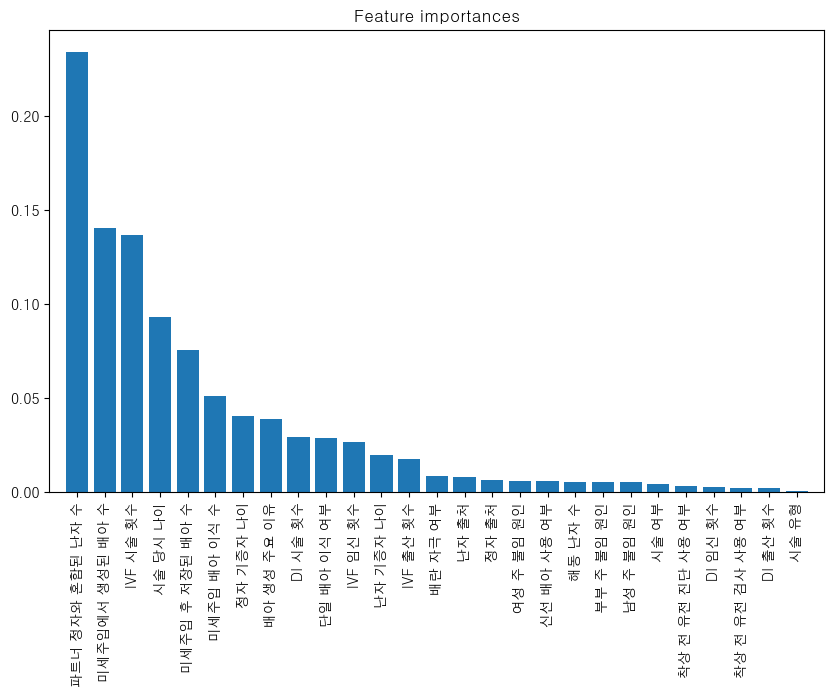

In [171]:
# 데이터 분리
X = filtered_df.drop('임신 성공 여부', axis=1)
y = filtered_df['임신 성공 여부']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred_val = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Validation Classification Report:\n", classification_report(y_val, y_pred_val))

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
  print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
# 테스트 데이터 예측
test_predictions = model.predict(filtered_test_df)
test_predictions

(90067,)

In [174]:
sample_submission = pd.read_csv('D:/김동영/11_Github/mygit/LGaimers 6기/Data/sample_submission.csv')
sample_submission['probability'] = test_predictions

In [177]:
sample_submission['probability'].value_counts()

probability
0    80477
1     9590
Name: count, dtype: int64

In [ ]:

sample_submission.to_csv('D:/김동영/11_Github/mygit/LGaimers 6기/Submission/0207.csv', index=False)